In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

2025-12-18 12:54:36.895859: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-18 12:54:37.027554: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-18 12:54:37.950243: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-18 12:54:37.953774: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-18 12:54:39.929763: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

 Data reshaped for LSTM: (101637, 10, 15) (101637,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                20480     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 22593 (88.25 KB)
Trainable params: 22593 (88.25 KB)
Non-trainable params: 0 (0.00 Byte)
__________________________________

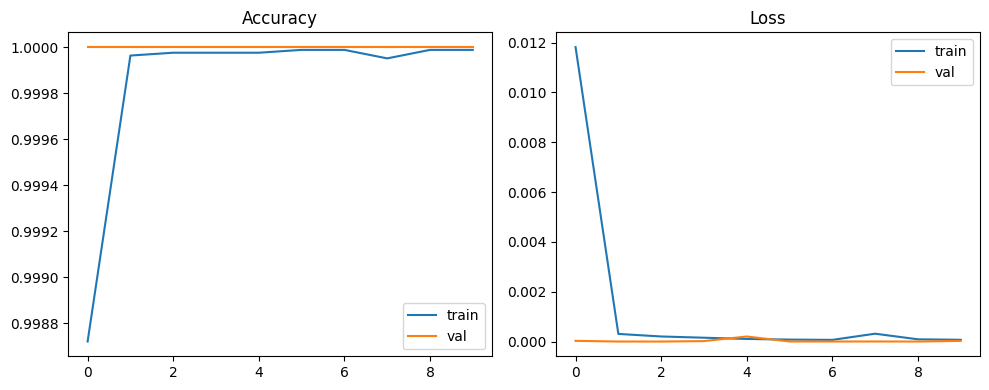

636/636 [==============================] - 3s 4ms/step - loss: 2.7392e-05 - accuracy: 1.0000

 Test Accuracy: 1.0000


In [ ]:
file_path = "data/Phasor Measurement Unit Data - Labeled/PMU_data.xlsx"
df = pd.read_excel(file_path)

# Drop the unnamed index column
df = df.drop(columns=['Unnamed: 0'])

# Separate features and label
X = df.drop(columns=['Class Labels']).values
y = df['Class Labels'].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


window_size = 10
X_seq, y_seq = [], []

for i in range(len(X_scaled) - window_size):
    X_seq.append(X_scaled[i:i+window_size])
    y_seq.append(y[i+window_size])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

print(" Data reshaped for LSTM:", X_seq.shape, y_seq.shape)


X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42, stratify=y_seq)

# Build LSTM model
model = Sequential([
    LSTM(64, input_shape=(window_size, X_seq.shape[2]), return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Train
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Plot accuracy/loss
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate
loss, acc = model.evaluate(X_test, y_test)
print(f"\n Test Accuracy: {acc:.4f}")
